# Analysis Market Price using mplfinace

## 0. Preparation

### 0.1 Imports

In [19]:
import urllib.request
import json
import mplfinance as mpf 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 8)
#plt.rc('font', family='Cascadia Code PL')
import numpy as np
import pandas as pd
pd.options.plotting.backend = 'matplotlib' # "plotly"
pd.set_option('display.max_columns', 0)
#import plotly.express as px
import pprint
pp = pprint.PrettyPrinter(indent=4)

BASEURL = 'http://localhost:18080/kabusapi/'
BASEURL_TEST = 'http://localhost:18081/kabusapi/'

### 0.2 Functions

#### Groupby Time

In [80]:
# freq = 1s, 1min, 5min, 1h, ...
def groupByTime(df, col, freq='1s'):
    df[col+'Time'] = pd.to_datetime(df[col+'Time'])
    df_sel = data.loc[:, [col+'Time', col]]
    df_gb = df_sel.groupby(pd.Grouper(key=col+'Time', freq=freq))
    return df_gb

#### Create Stock data

In [92]:
def CreateStockData(df, col, freq='1s'):
    df_gb = groupByTime(df, col, freq=freq)
    df_vol = groupByTime(df, 'TradingVolume', freq=freq).max()
    df_vol = df_vol.diff()
    df_stock = pd.concat([df_gb.first(), df_gb.max(), df_gb.min(), df_gb.last(), df_vol], axis=1)
    df_stock = df_stock.set_axis(['Open', 'High', 'Low', 'Close', 'Volume'], axis='columns')
    return df_stock

#### mpfplot

In [69]:
def mpfplot(data, **kwargs):
    style = mpf.make_mpf_style(base_mpf_style='nightclouds', rc={"font.family":'MS Gothic'})
    return mpf.plot(data, figsize=(16, 8), style=style, returnfig=True, **kwargs)

## 1. Data

In [79]:
data = pd.read_csv('push_data.csv')
print('data.shape:, ', data.shape)
data.head()

data.shape:,  (28665, 82)


,Unnamed: 0,OverSellQty,UnderBuyQty,TotalMarketValue,MarketOrderSellQty,MarketOrderBuyQty,BidTime,AskTime,Exchange,ExchangeName,TradingVolume,TradingVolumeTime,VWAP,TradingValue,BidQty,BidPrice,BidSign,AskQty,AskPrice,AskSign,Symbol,SymbolName,CurrentPrice,CurrentPriceTime,CurrentPriceChangeStatus,CurrentPriceStatus,CalcPrice,PreviousClose,PreviousCloseTime,ChangePreviousClose,ChangePreviousClosePer,OpeningPrice,OpeningPriceTime,HighPrice,HighPriceTime,LowPrice,LowPriceTime,SecurityType,Buy1_Sign,Buy1_Time,Buy1_Price,Buy1_Qty,Buy2_Price,Buy2_Qty,Buy3_Price,Buy3_Qty,Buy4_Price,Buy4_Qty,Buy5_Price,Buy5_Qty,Buy6_Price,Buy6_Qty,Buy7_Price,Buy7_Qty,Buy8_Price,Buy8_Qty,Buy9_Price,Buy9_Qty,Buy10_Price,Buy10_Qty,Sell1_Sign,Sell1_Time,Sell1_Price,Sell1_Qty,Sell2_Price,Sell2_Qty,Sell3_Price,Sell3_Qty,Sell4_Price,Sell4_Qty,Sell5_Price,Sell5_Qty,Sell6_Price,Sell6_Qty,Sell7_Price,Sell7_Qty,Sell8_Price,Sell8_Qty,Sell9_Price,Sell9_Qty,Sell10_Price,Sell10_Qty
0,0,4565300.0,1662300.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:48+09:00,2021-09-17T09:31:48+09:00,1,東証１部,3088300.0,2021-09-17T09:31:47+09:00,743.2365,2.295337e+09,1100.0,742.4,101,2200.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:47+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:48+09:00,742.1,2200.0,742.0,800.0,741.9,3300.0,741.8,3600.0,741.7,5800.0,741.6,3400.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:48+09:00,742.4,1100.0,742.5,2300.0,742.6,5100.0,742.7,4900.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0,743.2,6600.0,743.3,4500.0
1,0,4565900.0,1662300.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3089900.0,2021-09-17T09:31:49+09:00,743.2359,2.296525e+09,1100.0,742.4,101,2200.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:49+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,742.1,2200.0,742.0,700.0,741.9,3300.0,741.8,3600.0,741.7,5800.0,741.6,3400.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.4,1100.0,742.5,2300.0,742.6,5100.0,742.7,4900.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0,743.2,6600.0,743.3,4500.0
2,0,4577000.0,1659500.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3089900.0,2021-09-17T09:31:49+09:00,743.2359,2.296525e+09,100.0,742.2,101,600.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:49+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,742.1,600.0,742.0,700.0,741.9,700.0,741.8,2300.0,741.7,4100.0,741.6,2100.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.2,100.0,742.3,2100.0,742.4,1500.0,742.5,2300.0,742.6,6300.0,742.7,5400.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0
3,0,4577000.0,1659500.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:49+09:00,2021-09-17T09:31:49+09:00,1,東証１部,3090200.0,2021-09-17T09:31:50+09:00,743.2358,2.296747e+09,100.0,742.2,101,600.0,742.1,101,4689,Ｚホールディングス,742.1,2021-09-17T09:31:50+09:00,58,1,742.1,735.7,2021-09-16T00:00:00+09:00,6.4,0.87,742.3,2021-09-17T09:00:00+09:00,746.0,2021-09-17T09:10:25+09:00,740.9,2021-09-17T09:18:42+09:00,1,101,2021-09-17T09:31:49+09:00,742.1,600.0,742.0,700.0,741.9,700.0,741.8,2300.0,741.7,4100.0,741.6,2100.0,741.5,4700.0,741.4,16400.0,741.3,4700.0,741.2,6100.0,101,2021-09-17T09:31:49+09:00,742.2,100.0,742.3,2100.0,742.4,1500.0,742.5,2300.0,742.6,6300.0,742.7,5400.0,742.8,5500.0,742.9,9100.0,743.0,40800.0,743.1,6100.0
4,0,4576300.0,1659700.0,5.681751e+12,0.0,0.0,2021-09-17T09:31:50+09:00,2021-09-17T09:31:50+09:00,1,東証１部,3090200.0,2021-09-17T09:31:50+09:00,743.2358,2.296747e+09,100.0,742.2,101,200.0,742.1,101,46

## Price plot

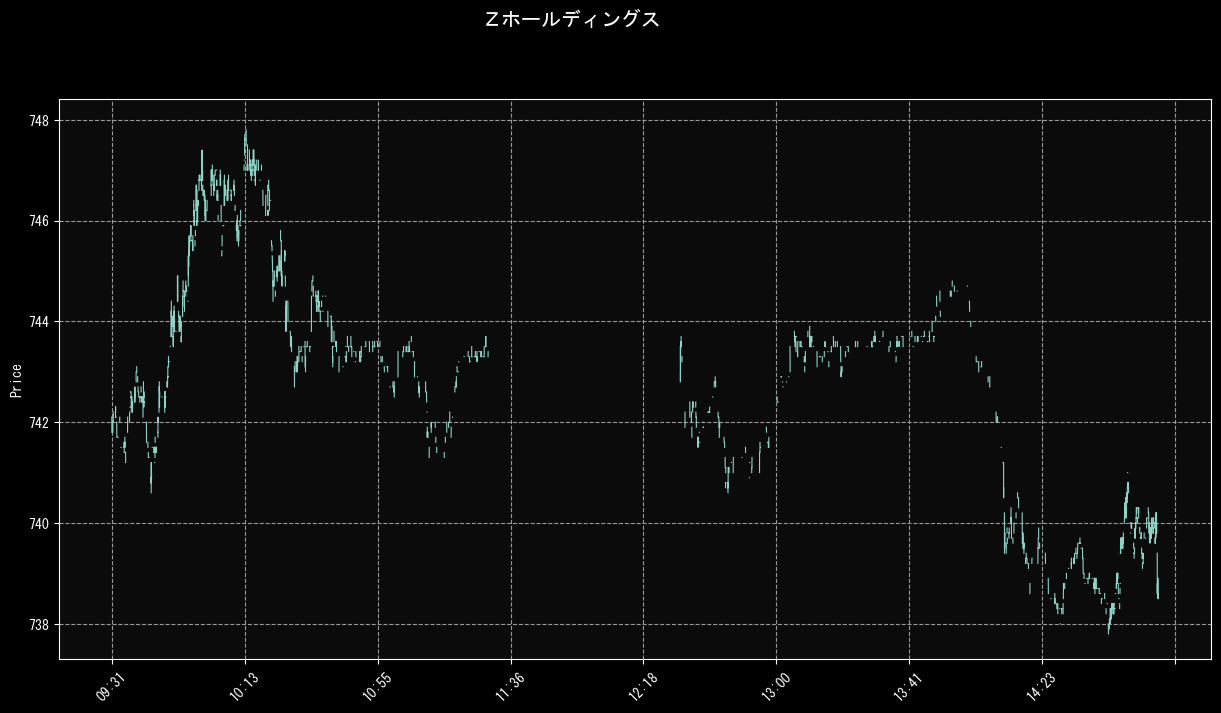

In [89]:
cp_1s = CreateStockData(data, 'CurrentPrice', '1s')
fig, ax = mpfplot(cp_1s, type='line', title=data.SymbolName[0])

## Time based increasing

(<Figure size 1600x800 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

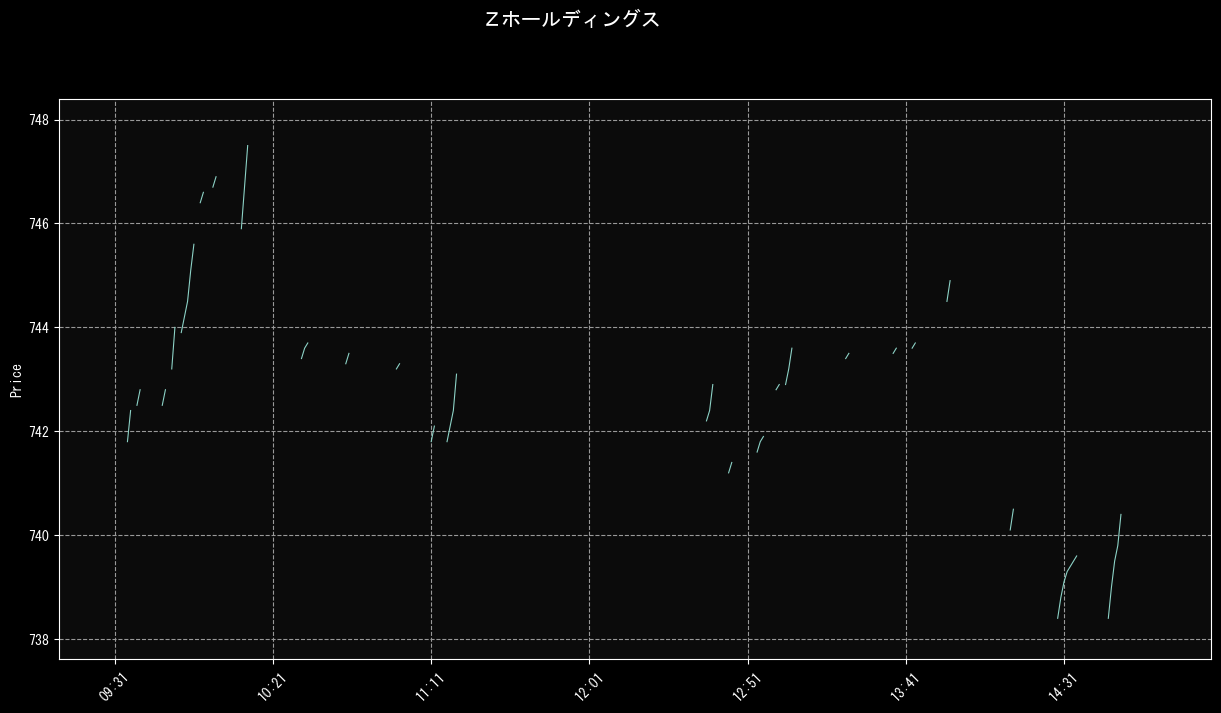

In [100]:
cp_1min = CreateStockData(data, 'CurrentPrice', '1min')
mpfplot(cp_1min[cp_1min > cp_1min.shift()], type='line', title=data.SymbolName[0])

## Diff plot

(<Figure size 1600x800 with 2 Axes>, [<Axes:ylabel='Price'>, <Axes:>])

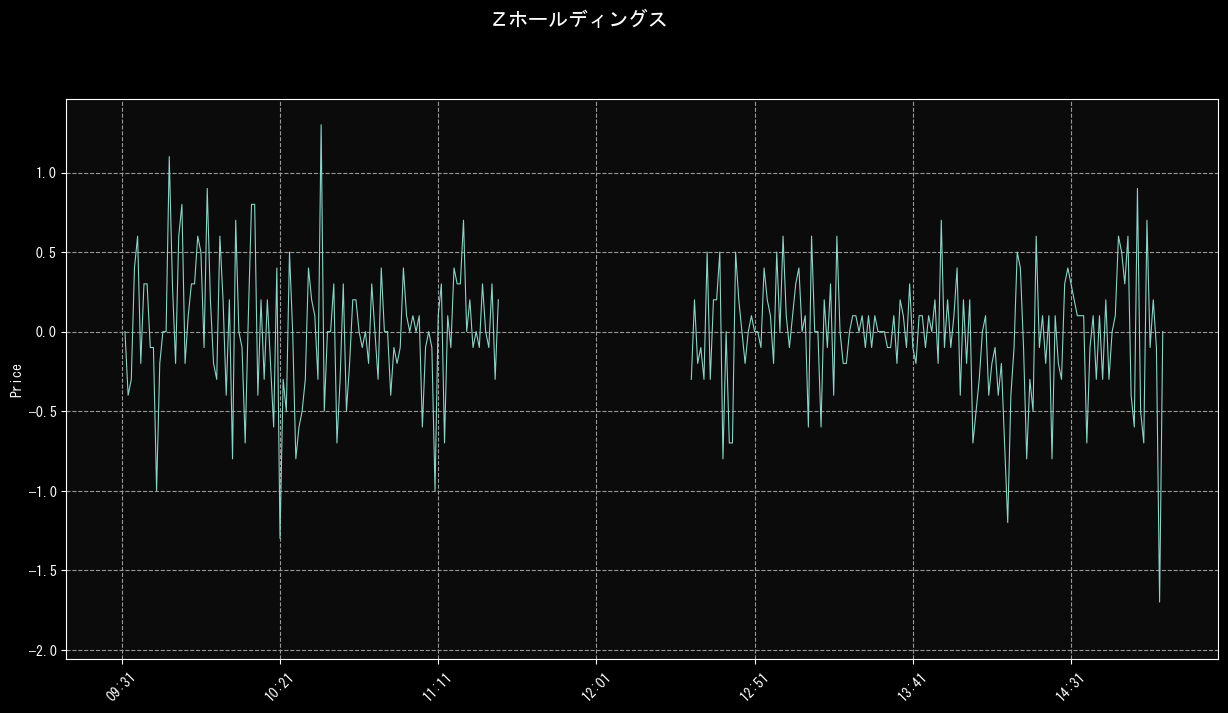

In [102]:
cp_1min = CreateStockData(data, 'CurrentPrice', '1min')
mpfplot(cp_1min.diff(), type='line', title=data.SymbolName[0])
#cp_60.diff().plot(ax=ax, label='min diff')
#plt.title(data.SymbolName[0], fontname="MS Gothic")
#plt.ylabel('CurrentPrice')
#plt.legend()
#plt.grid(True)

## Candle plot

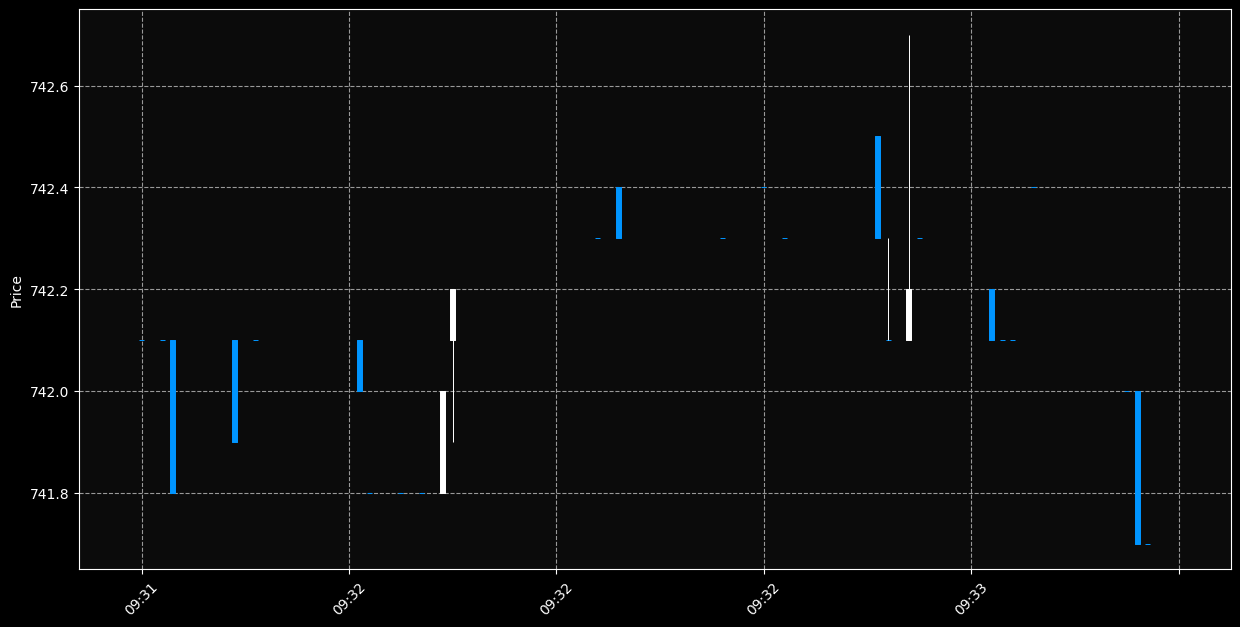

In [215]:
df = pd.concat([cp_s.first(), cp_s.max(), cp_s.min(), cp_s.last()], axis=1)
df = df.set_axis(['Open', 'High', 'Low', 'Close'], axis='columns')
mpf.plot(df.iloc[0:100, :], type='candle', figsize=(16, 8), style='nightclouds')

(<Figure size 1600x800 with 4 Axes>,
 [<Axes:ylabel='Price'>, <Axes:>, <Axes:ylabel='Volume  $10^{6}$'>, <Axes:>])

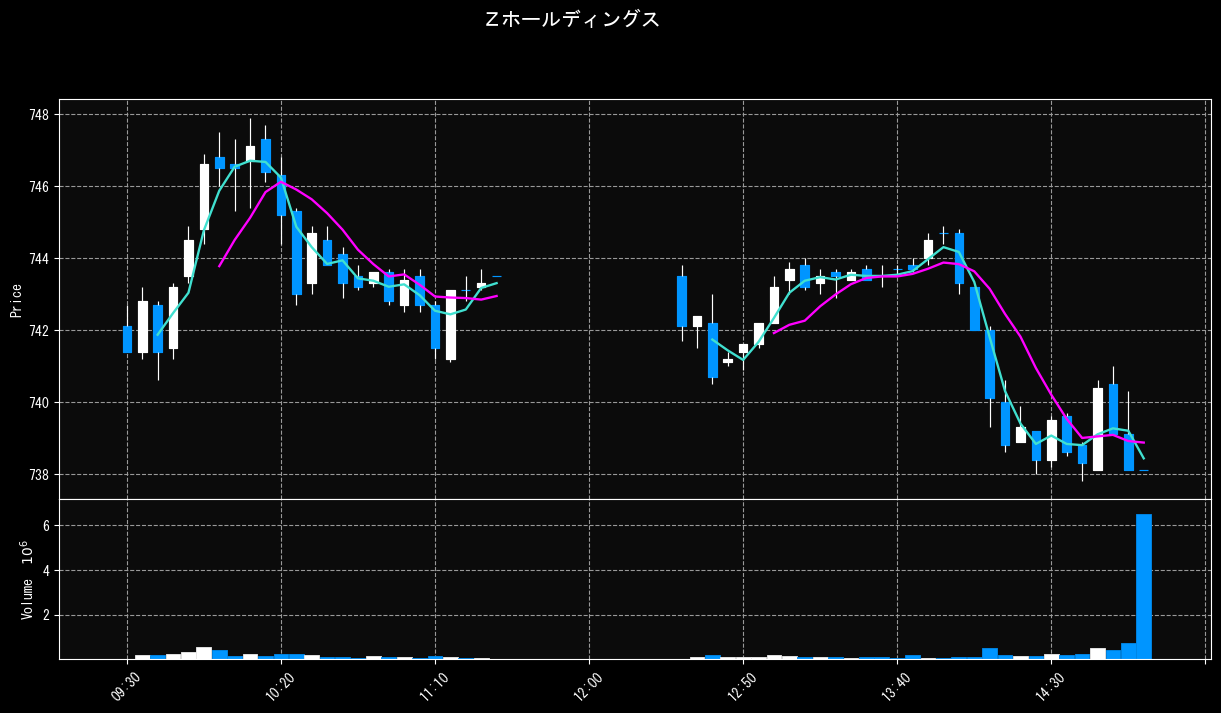

In [93]:
cp_5m = CreateStockData(data, 'CurrentPrice', '5min')
mpfplot(cp_5m, type='candle', mav=(3, 7), title=data.SymbolName[0], volume=True)